## 编码器-解码器架构
正如我们在 9.5节中所讨论的，机器翻译是序列转换模型的⼀个核⼼问题，其输⼊和输出都是⻓度可变的序
列。为了处理这种类型的输⼊和输出，我们可以设计⼀个包含两个主要组件的架构：第⼀个组件是⼀个编码器
（encoder）：它接受⼀个⻓度可变的序列作为输⼊，并将其转换为具有固定形状的编码状态。第⼆个组件是解码
器（decoder）：它将固定形状的编码状态映射到⻓度可变的序列。这被称为编码器-解码器（encoder-decoder）
架构，如 图9.6.1 所⽰。  
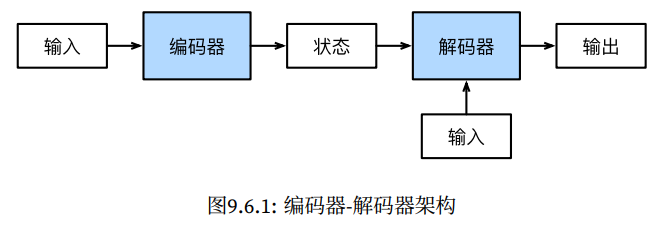

我们以英语到法语的机器翻译为例：给定⼀个英⽂的输⼊序列：“They”“are”“watching”“.”。⾸先，这种
“编码器－解码器”架构将⻓度可变的输⼊序列编码成⼀个“状态”，然后对该状态进⾏解码，⼀个词元接着
⼀个词元地⽣成翻译后的序列作为输出：“Ils”“regordent”“.”。由于“编码器－解码器”架构是形成后续
章节中不同序列转换模型的基础，因此本节将把这个架构转换为接⼝⽅便后⾯的代码实现。

## 编码器
在编码器接⼝中，我们只指定⻓度可变的序列作为编码器的输⼊X。任何继承这个Encoder基类的模型将完成
代码实现。

In [1]:
from torch import nn

#@save
class Encoder(nn.Module):
    """编码器-解码器架构的基本编码器接⼝"""
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)

    def forward(self, X, *args):
        raise NotImplementedError

## 解码器
在下⾯的解码器接⼝中，我们新增⼀个init_state函数，⽤于将编码器的输出（enc_outputs）转换为编码后
的状态。注意，此步骤可能需要额外的输⼊，例如：输⼊序列的有效⻓度，这在 9.5.4节中进⾏了解释。为了
逐个地⽣成⻓度可变的词元序列，解码器在每个时间步都会将输⼊（例如：在前⼀时间步⽣成的词元）和编
码后的状态映射成当前时间步的输出词元。


In [2]:
#@save
class Decoder(nn.Module):
    """编码器-解码器架构的基本解码器接⼝"""
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)

    def init_state(self, enc_outputs, *args):
        raise NotImplementedError
    
    def forward(self, X, state):
        raise NotImplementedError

## 合并编码器和解码器
总⽽⾔之，“编码器-解码器”架构包含了⼀个编码器和⼀个解码器，并且还拥有可选的额外的参数。在前向
传播中，编码器的输出⽤于⽣成编码状态，这个状态⼜被解码器作为其输⼊的⼀部分。


In [3]:
#@save
class EncoderDecoder(nn.Module):
    """编码器-解码器架构的基类"""
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_X, dec_X, *args):
        enc_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_outputs, *args)
        return self.decoder(dec_X, dec_state)

“编码器－解码器”体系架构中的术语状态会启发⼈们使⽤具有状态的神经⽹络来实现该架构。在下⼀节中，
我们将学习如何应⽤循环神经⽹络，来设计基于“编码器－解码器”架构的序列转换模型。


## 小结
* “编码器－解码器”架构可以将⻓度可变的序列作为输⼊和输出，因此适⽤于机器翻译等序列转换问题。
* 编码器将⻓度可变的序列作为输⼊，并将其转换为具有固定形状的编码状态。
* 解码器将具有固定形状的编码状态映射为⻓度可变的序列。
